src:
- https://www.youtube.com/watch?v=jztwpsIzEGc
- https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

# Dependencies and Setup

In [1]:
import tensorflow as tf

2025-03-12 16:46:18.540656: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 16:46:18.543678: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 16:46:18.553345: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741794378.569713   31150 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741794378.574548   31150 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 16:46:18.591510: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2025-03-12 16:16:48.801950: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
tf.config.list_physical_devices('GPU')

[]

# Load Data

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
path = "../../Database/images"
data = tf.keras.utils.image_dataset_from_directory(path)
class_names = data.class_names

Found 3049 files belonging to 22 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

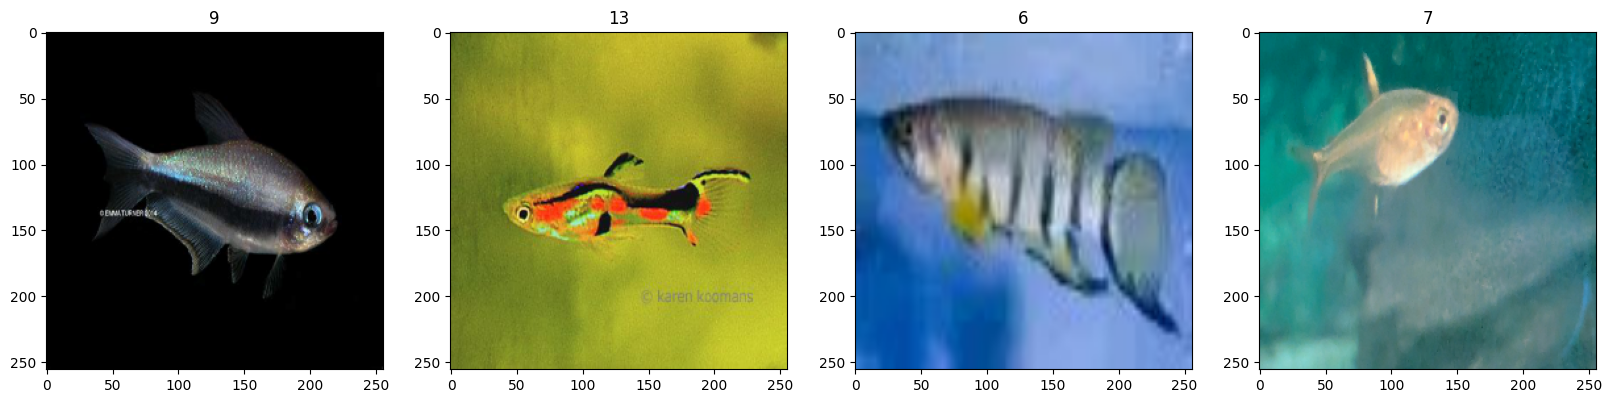

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[5.80185354e-01, 3.68420660e-01, 1.87925085e-01],
          [6.08609080e-01, 3.82138491e-01, 2.01256126e-01],
          [5.60508549e-01, 3.60508591e-01, 1.91881120e-01],
          ...,
          [5.21292865e-01, 4.59099263e-01, 3.17647070e-01],
          [6.38882518e-01, 5.91823697e-01, 4.90345448e-01],
          [7.39464641e-01, 6.61695778e-01, 4.78335619e-01]],
 
         [[5.76780796e-01, 3.65016073e-01, 1.87565103e-01],
          [6.05032146e-01, 3.81502748e-01, 2.05032170e-01],
          [5.75306356e-01, 3.64265472e-01, 1.91716447e-01],
          ...,
          [5.21396279e-01, 4.58651185e-01, 3.17474723e-01],
          [4.81445312e-01, 4.23111975e-01, 2.92719811e-01],
          [4.82789516e-01, 4.27887559e-01, 3.14162076e-01]],
 
         [[5.82843125e-01, 3.71078432e-01, 1.98529407e-01],
          [6.10439658e-01, 3.95243555e-01, 2.32988670e-01],
          [5.99774063e-01, 3.88009340e-01, 2.15460330e-01],
          ...,
          [5.07965684e-01, 4.41084564e-01, 3.1167

# Split Data

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
train_size

67

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Extract images and labels

In [14]:
train_images = []
train_labels = []

In [15]:
for images, labels in train:
    train_images.append(images.numpy())  # Append image batch
    train_labels.append(labels.numpy())  # Append label batch

2025-03-12 16:16:55.197248: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
# Convert lists to numpy arrays
train_images = np.concatenate(train_images, axis=0)  # Concatenate all batches along the first axis (samples)
train_labels = np.concatenate(train_labels, axis=0)

In [17]:
val_images = []
val_labels = []

In [18]:
for images, labels in val:
    val_images.append(images.numpy())  # Append image batch
    val_labels.append(labels.numpy())  # Append label batch

print("val_labels before concatenation:", val_labels)

val_labels before concatenation: [array([ 4,  9, 10, 11,  1, 14,  4, 18, 17,  7,  1, 14,  3,  7, 20,  9,  4,
        2, 19,  4, 18, 18, 10, 16, 11, 15, 18, 14,  6, 15,  8, 11],
      dtype=int32), array([18, 16, 11,  2, 15, 11, 16, 11, 10, 18, 11, 14, 16,  1,  3,  4, 13,
       17,  3, 20,  7, 11, 13,  6,  8,  8, 21,  4, 16,  6,  4, 14],
      dtype=int32), array([11, 14,  7,  6,  7,  9, 15,  6, 13, 21, 16, 11,  4, 19,  1,  1,  6,
        0,  0, 15,  7,  9, 15,  9,  6, 16,  7,  4, 11,  6, 16,  5],
      dtype=int32), array([ 6, 15, 16, 19, 12, 11, 12,  9,  9,  7, 17, 21, 11,  9,  1,  1,  7,
       14,  5, 12, 14, 10, 13,  7, 10,  5, 13, 17, 12,  1,  1, 20],
      dtype=int32), array([15,  4,  5, 14, 20, 14,  7, 11, 21, 11, 18,  7, 20, 14,  7, 17, 12,
        7, 19, 12, 20, 13, 11,  2, 11, 19,  7, 10,  3, 16,  7, 14],
      dtype=int32), array([14,  5, 19, 17, 15,  4, 14,  6,  4, 11,  0,  4,  6, 14,  5, 14, 14,
       12,  0,  6, 12, 16, 15,  6,  3, 21,  6,  1, 13, 17, 16, 17],
      dt

2025-03-12 16:16:59.890831: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
# Convert lists to numpy arrays
val_images = np.concatenate(val_images, axis=0)  # Concatenate all batches along the first axis (samples)
val_labels = np.concatenate(val_labels, axis=0)

# Build Deep Learning Model

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
# First convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Second convolutional layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Third convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))

# Output layer for 22 classes
model.add(Dense(22, activation='softmax'))

/run/media/mad/SATA_SSD/Projekte/Git/Varanasi3DErfassung/AquariumFishRecognition/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
# One-hot encode the labels
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=22)
val_labels_one_hot = to_categorical(val_labels, num_classes=22)

# Check shapes of the data
print("train_images shape:", train_images.shape)  # (num_train_samples, height, width, channels)
print("train_labels_one_hot shape:", train_labels_one_hot.shape)  # (num_train_samples, 22)
print("val_images shape:", val_images.shape)  # (num_val_samples, height, width, channels)
print("val_labels_one_hot shape:", val_labels_one_hot.shape)  # (num_val_samples, 22)

train_images shape: (2144, 256, 256, 3)
train_labels_one_hot shape: (2144, 22)
val_images shape: (608, 256, 256, 3)
val_labels_one_hot shape: (608, 22)


In [26]:
# Compile the model with categorical crossentropy
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,702,022 (14.12 MB)

 Trainable params: 3,702,022 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train_images, train_labels_one_hot, epochs=20,
                 validation_data=(val_images, val_labels_one_hot),
                 callbacks=[tensorboard_callback])


Epoch 1/20


2025-03-12 16:17:01.182615: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1686110208 exceeds 10% of free system memory.


67/67 ━━━━━━━━━━━━━━━━━━━━ 48s 683ms/step - accuracy: 0.0738 - loss: 3.0916 - val_accuracy: 0.1579 - val_loss: 2.8503
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 35s 525ms/step - accuracy: 0.2358 - loss: 2.5979 - val_accuracy: 0.3602 - val_loss: 2.2594
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 432ms/step - accuracy: 0.5157 - loss: 1.7148 - val_accuracy: 0.4572 - val_loss: 2.0719
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 433ms/step - accuracy: 0.7742 - loss: 0.8681 - val_accuracy: 0.4934 - val_loss: 2.2974
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 425ms/step - accuracy: 0.9112 - loss: 0.3373 - val_accuracy: 0.5164 - val_loss: 2.8004
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 429ms/step - accuracy: 0.9651 - loss: 0.1565 - val_accuracy: 0.4934 - val_loss: 2.8830
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 423ms/step - accuracy: 0.9698 - loss: 0.1304 - val_accuracy: 0.5247 - val_loss: 3.2080
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 424ms/step - accuracy: 0.9841 - loss: 0.0966 - val_accuracy: 0.529

# Plot Performance

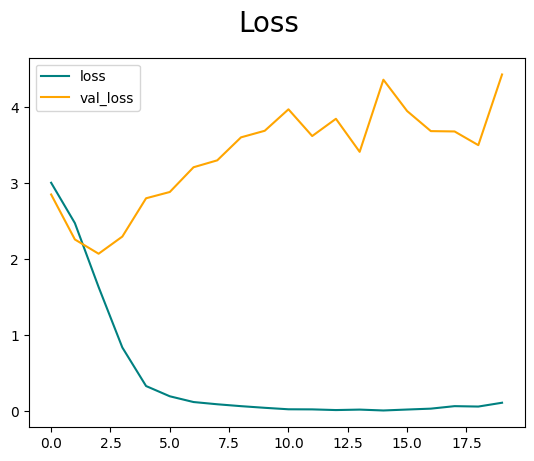

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

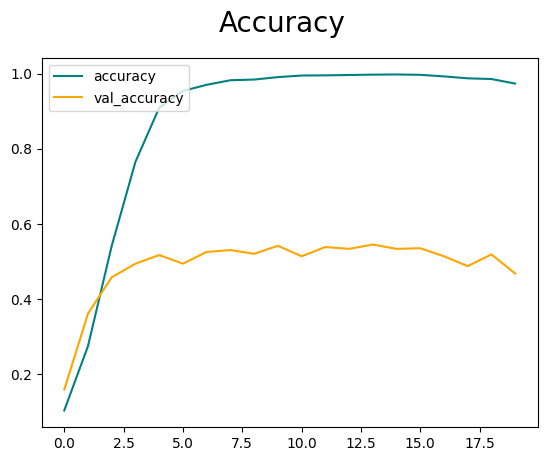

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [35]:
# Iterate over test dataset
for batch in test.as_numpy_iterator():
    X, y = batch

    # Ensure `y` is one-hot encoded
    y_one_hot = to_categorical(y, num_classes=22)  # Convert labels to one-hot

    # Get model predictions
    yhat = model.predict(X)

    # Update metrics
    pre.update_state(y_one_hot, yhat)  # Use one-hot encoded labels
    re.update_state(y_one_hot, yhat)   # Use one-hot encoded labels
    acc.update_state(y_one_hot, yhat)  # Use one-hot encoded labels

# Print final metric values
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Precision: 0.42323651909828186
Recall: 0.3541666567325592
Accuracy: 0.375


# Test

In [36]:
import cv2

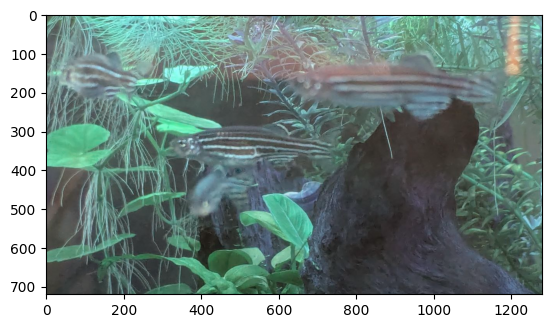

In [37]:
img = cv2.imread('test_pictures/Brachydanio.jpeg')
plt.imshow(img)
plt.show()

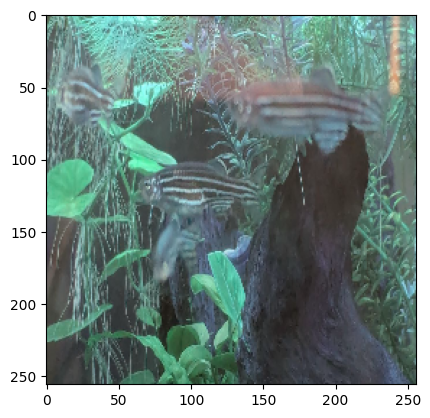

In [38]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [40]:
yhat

array([[1.5747370e-02, 1.1974881e-04, 1.5632741e-01, 9.2473403e-02,
        1.0284458e-05, 1.4458529e-02, 4.4595561e-04, 6.7287634e-05,
        1.3688309e-04, 2.5437062e-03, 1.2954380e-06, 7.0853042e-04,
        2.3615778e-04, 1.9939231e-02, 6.8936354e-01, 6.4364299e-03,
        2.8701656e-04, 2.1573952e-04, 2.5518920e-04, 1.5753725e-05,
        2.2850341e-05, 1.8765505e-04]], dtype=float32)

In [41]:
# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is: {class_names[predicted_class]}')

Predicted class is: Pterophyllum_scalare


# Save the Model